## FYP

## Topic 1: 北京PM2.5浓度回归分析
预测接下来一段时间内北京的PM2.5指数

### 数据主要包括2010年1月1日至2014年12月31日间北京pm2.5指数以及相关天气指数数据。
### 数据分为训练数据和测试数据，分别保存在pm25_train.csv和pm25_test.csv两个文件中。
### 其中训练数据主要包括35746条记录，13个字段，主要字段说明如下：
#### date：观测数据发生的日期（年-月-日）
#### hour：观测数据发生的时间点（时）
#### pm2.5：观测时间点对应的pm2.5指数（(ug/m^3)
#### DEWP：露点，空气中水气含量达到饱和的气温（â„ƒ）
#### TEMP：温度，观测时间点对应的温度（â„ƒ）
#### PRES：压强，观测时间点对应的压强（hPa）
#### Iws：累积风速，观测时间点对应的累积风速（m/s）
#### Is：累计降雪，到观测时间点为止累计降雪的时长（小时）
#### Ir：累计降雨，到观测时间点为止累计降雨的时长（小时）
#### cbwd_NE：观测时间点对应的风向为东北风(m/s) 
#### cbwd_NW：观测时间点对应的风向为西北风(m/s) 
#### cbwd_SE：观测时间点对应的风向为东南风(m/s) 
#### cbwd_cv：观测时间点对应的风向为静风(m/s)

## 1. Read the data

In [2]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, feature_extraction

import pandas as pd
df = pd.read_csv('pm25_train.csv')
df

,date,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,2010-01-02,0,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
1,2010-01-02,1,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2,2010-01-02,2,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
3,2010-01-02,3,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
4,2010-01-02,4,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
5,2010-01-02,5,109.0,-7,-6.0,1022.0,7.14,3,0,0,0,1,0
6,2010-01-02,6,105.0,-7,-6.0,1023.0,8.93,4,0,0,0,1,0
7,2010-01-02,7,124.0,-7,-5.0,1024.0,10.72,0,0,0,0,1,0
8,2010-01-02,8,120.0,-8,-6.0,1024.0,12.51,0,0,0,0,1,0
9,2010-01-02,9,132.0,-7,-5.0,1025.0,14.30,0,0,0,0,1,0


In [3]:
# break down date information
df['date'] = pd.to_datetime(df['date'])
df['day'] = df.date.dt.day
df['month'] = df.date.dt.month
df['week of year'] = df['date'].dt.strftime('%U')
df = df[['date','month','day','week of year','hour','DEWP','TEMP','PRES','Iws','Is','Ir','cbwd_NE','cbwd_NW','cbwd_SE','cbwd_cv','pm2.5']]
df

,date,month,day,week of year,hour,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,2010-01-02,1,2,00,0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0,129.0
1,2010-01-02,1,2,00,1,-15,-4.0,1020.0,2.68,0,0,0,0,1,0,148.0
2,2010-01-02,1,2,00,2,-11,-5.0,1021.0,3.57,0,0,0,0,1,0,159.0
3,2010-01-02,1,2,00,3,-7,-5.0,1022.0,5.36,1,0,0,0,1,0,181.0
4,2010-01-02,1,2,00,4,-7,-5.0,1022.0,6.25,2,0,0,0,1,0,138.0
5,2010-01-02,1,2,00,5,-7,-6.0,1022.0,7.14,3,0,0,0,1,0,109.0
6,2010-01-02,1,2,00,6,-7,-6.0,1023.0,8.93,4,0,0,0,1,0,105.0
7,2010-01-02,1,2,00,7,-7,-5.0,1024.0,10.72,0,0,0,0,1,0,124.0
8,2010-01-02,1,2,00,8,-8,-6.0,1024.0,12.51,0,0,0,0,1,0,120.0
9,2010-01-02,1,2,00,9,-7,-5.0,1025.0,14.30,0,0,0,0,1,0,132.0


In [4]:
df.columns

Index(['date', 'month', 'day', 'week of year', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [5]:
df.dtypes

date            datetime64[ns]
month                    int64
day                      int64
week of year            object
hour                     int64
DEWP                     int64
TEMP                   float64
PRES                   float64
Iws                    float64
Is                       int64
Ir                       int64
cbwd_NE                  int64
cbwd_NW                  int64
cbwd_SE                  int64
cbwd_cv                  int64
pm2.5                  float64
dtype: object

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

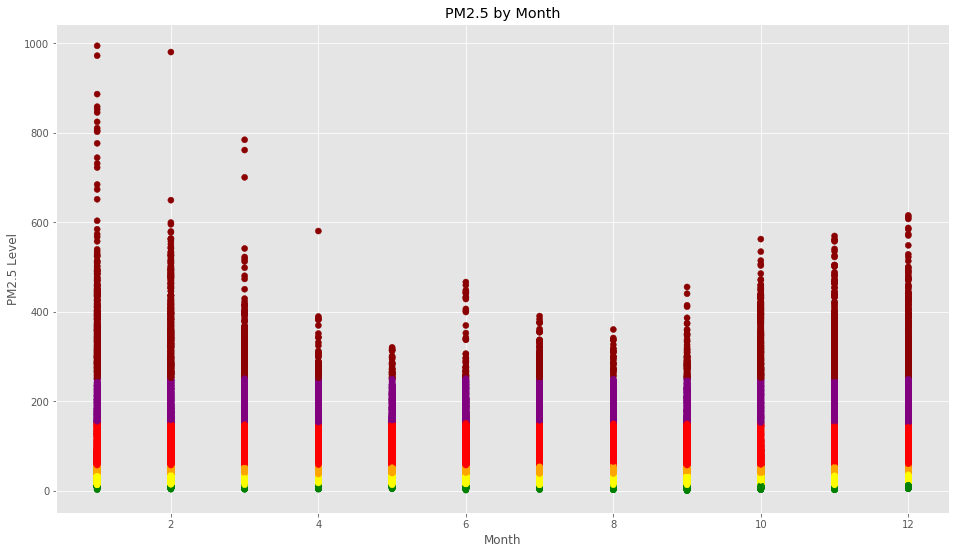

In [24]:
# plot features
x = df['month']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

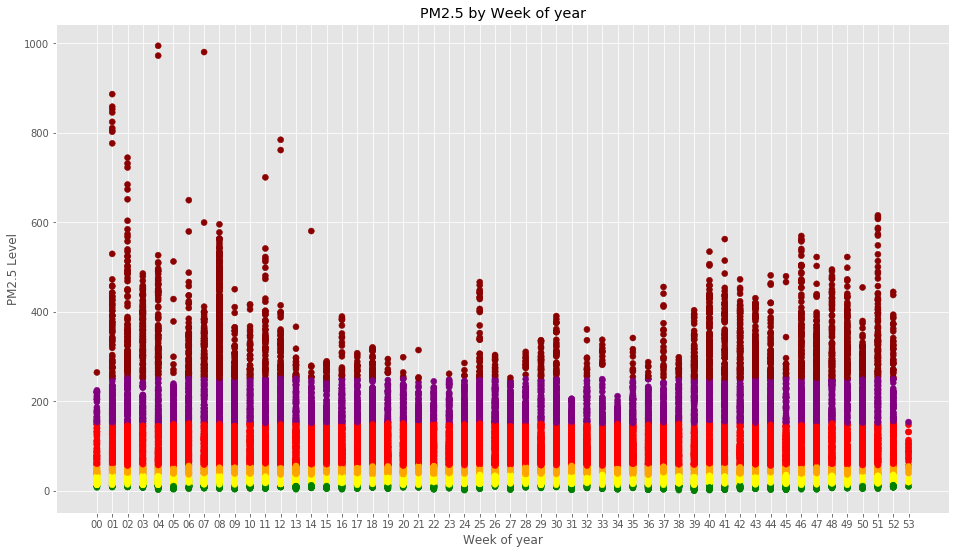

In [25]:
x = df['week of year']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Week of year')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Week of year')
plt.show()

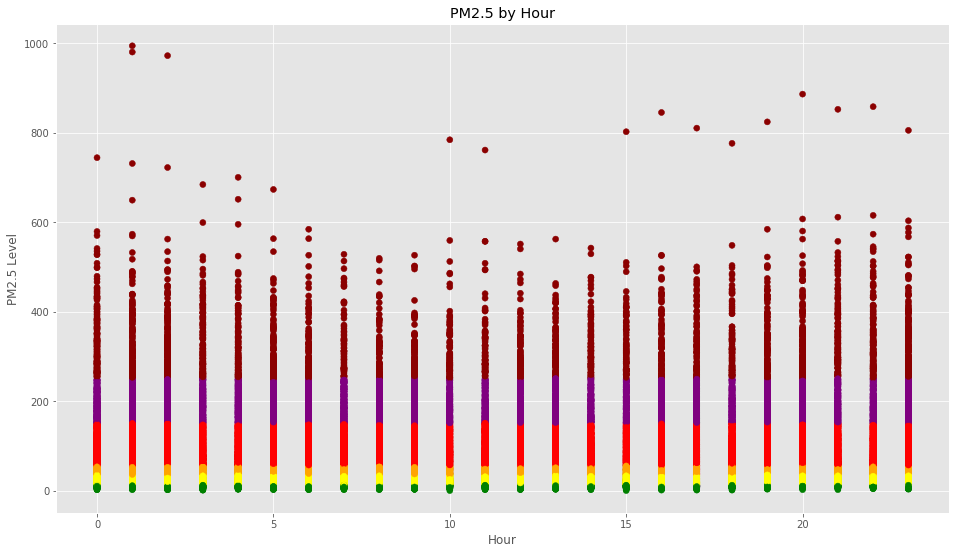

In [26]:
x = df['hour']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

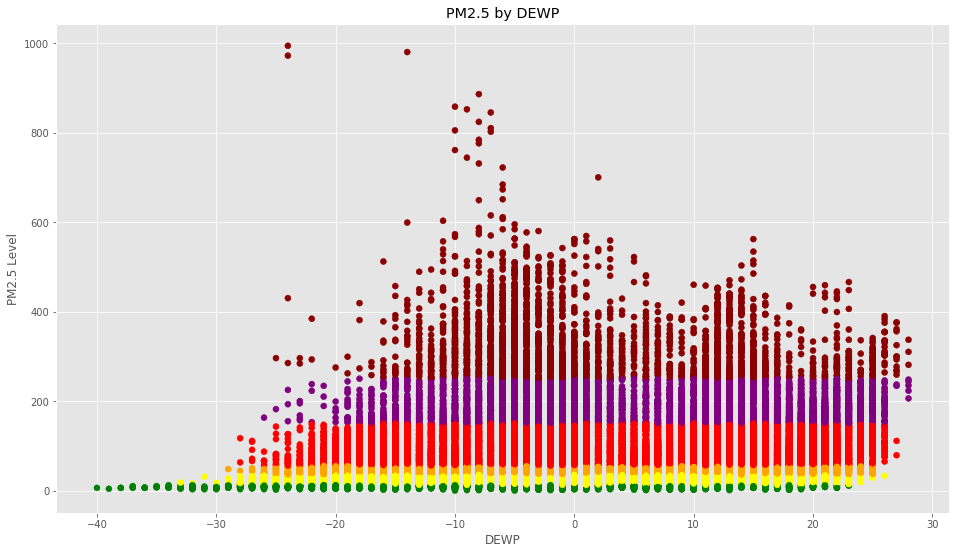

In [27]:
x = df['DEWP']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('DEWP')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by DEWP')
plt.show()

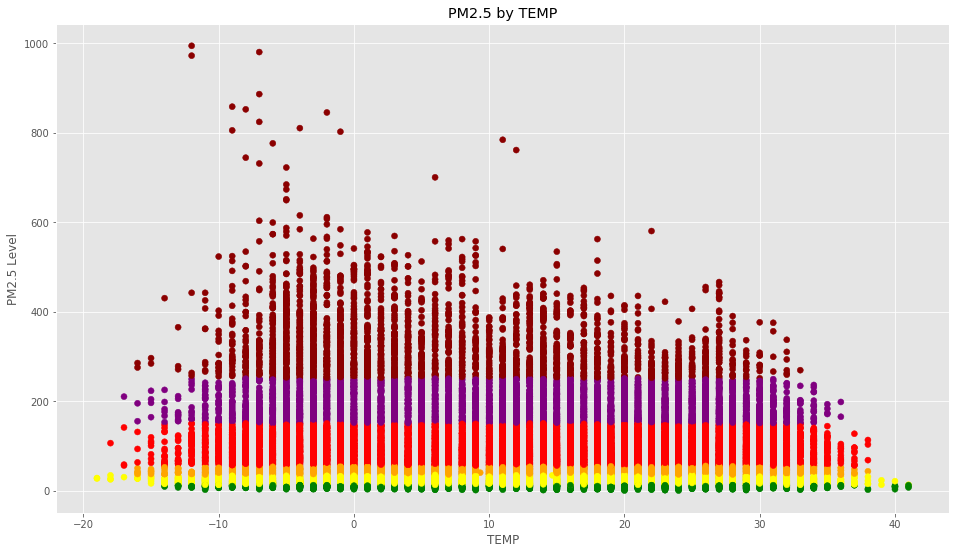

In [28]:
x = df['TEMP']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('TEMP')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by TEMP')
plt.show()

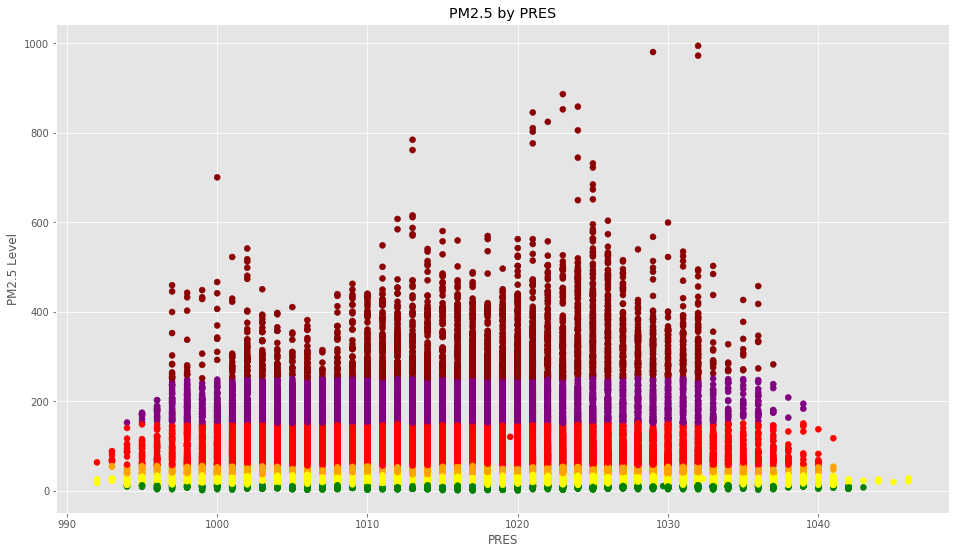

In [29]:
x = df['PRES']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('PRES')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by PRES')
plt.show()

In [33]:
len(df[df['pm2.5']>500])

106

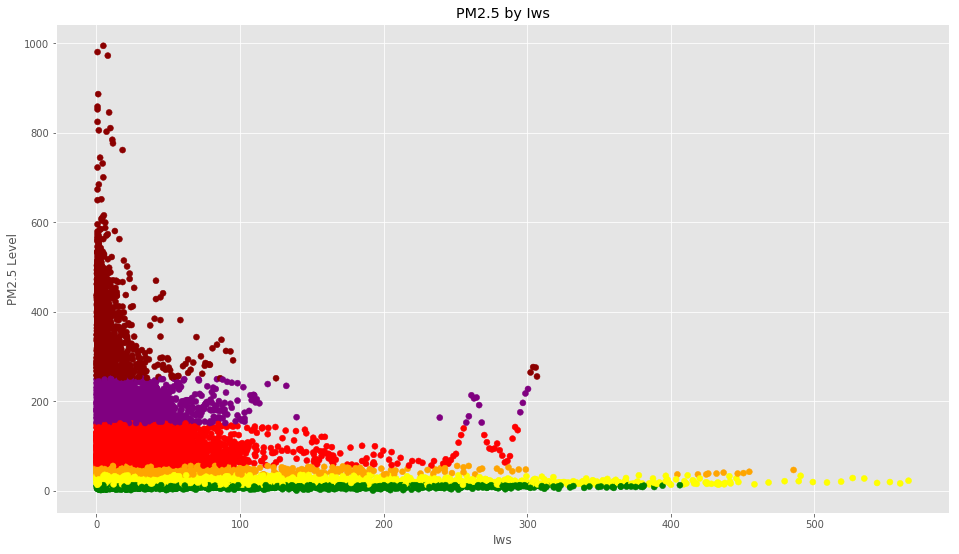

In [30]:
x = df['Iws']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Iws')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Iws')
plt.show()

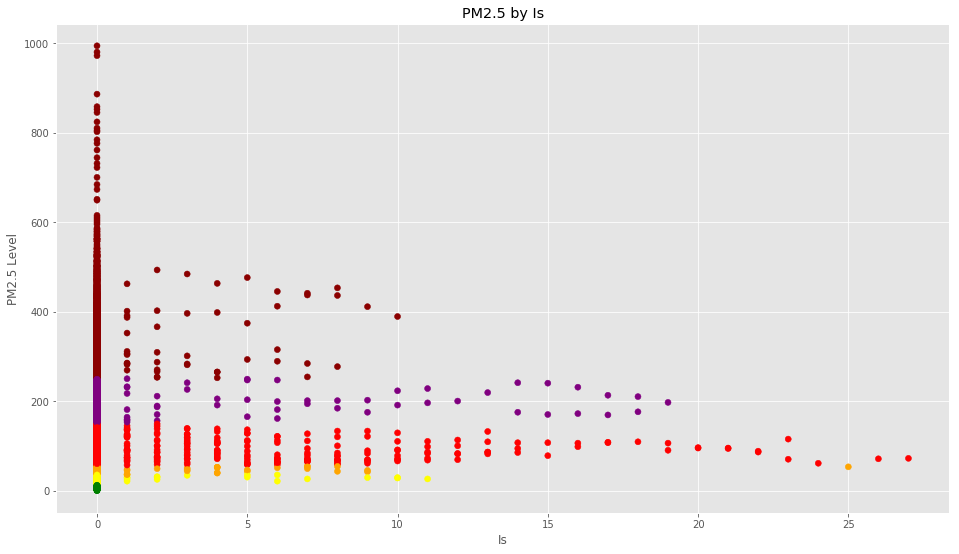

In [31]:
x = df['Is']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Is')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Is')
plt.show()

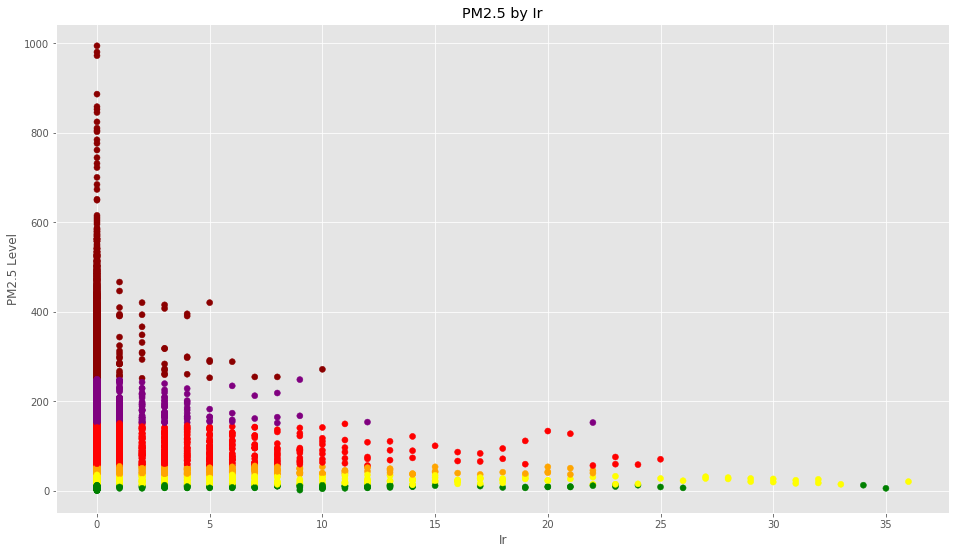

In [32]:
x = df['Ir']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Ir')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Ir')
plt.show()

In [ ]:
cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv

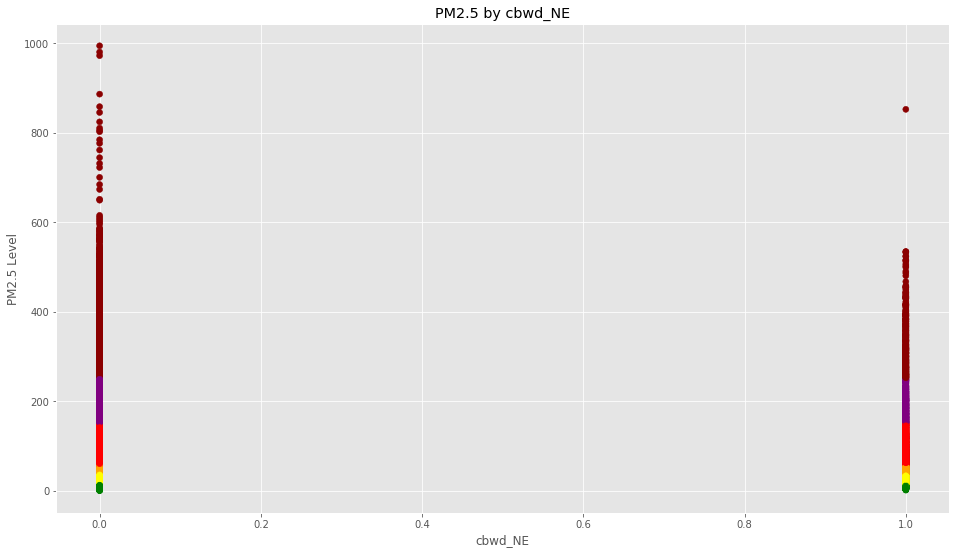

In [33]:
x = df['cbwd_NE']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('cbwd_NE')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by cbwd_NE')
plt.show()

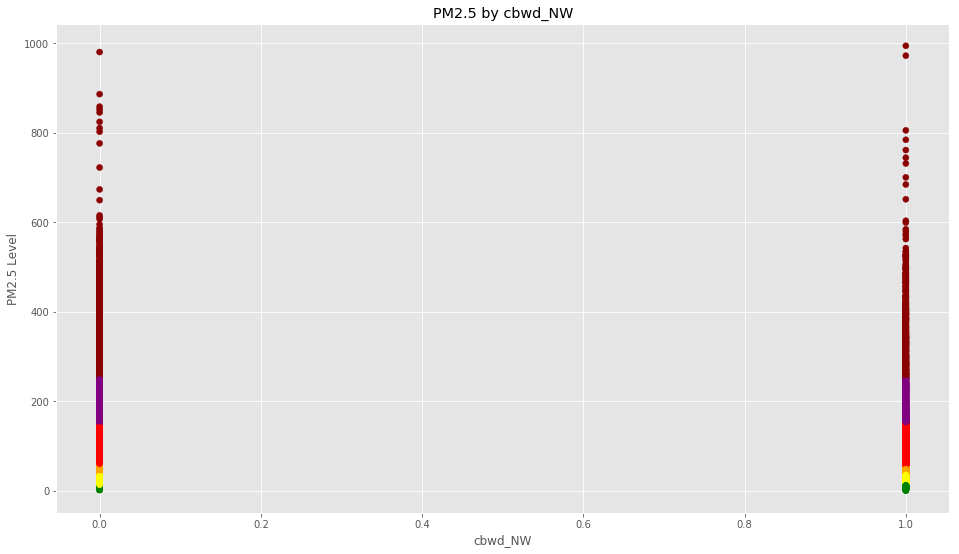

In [34]:
x = df['cbwd_NW']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('cbwd_NW')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by cbwd_NW')
plt.show()

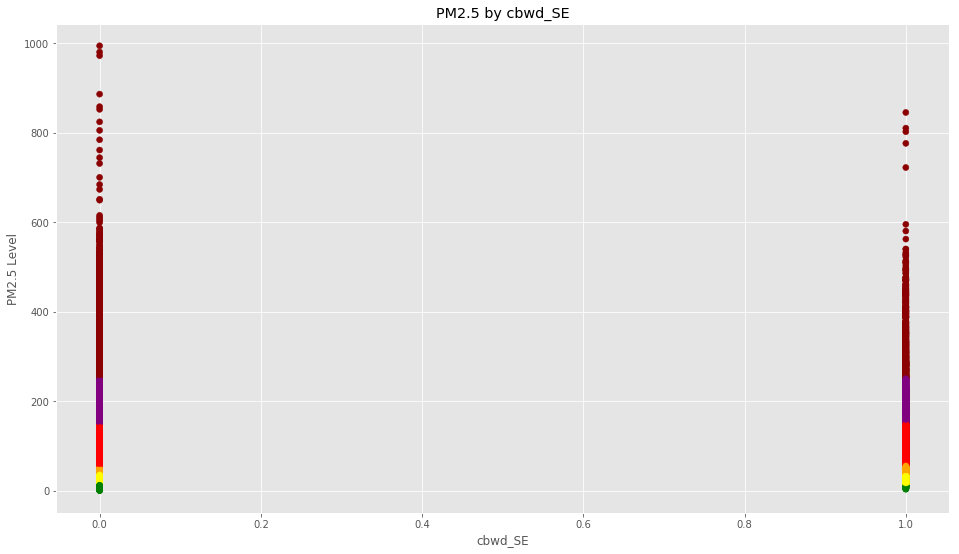

In [36]:
x = df['cbwd_SE']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('cbwd_SE')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by cbwd_SE')
plt.show()

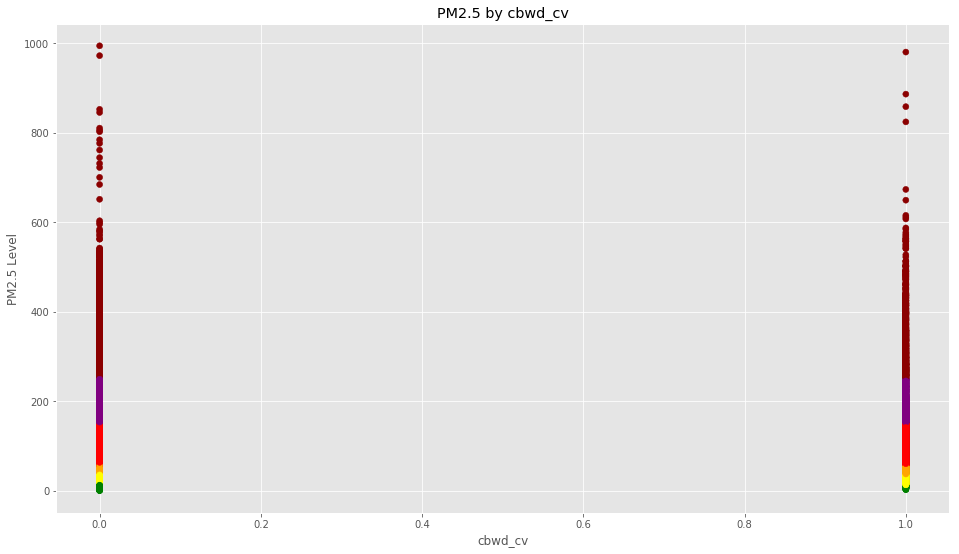

In [37]:
x = df['cbwd_cv']
y = df['pm2.5']
colors = ['green','yellow','orange','red','purple','darkred']
number = []
legend = ['Good','Moderate','Unhealthy for sensitive groups','Unhealthy','Very unhealthy','Hazardous']

for item in y:
    if (item <= 12):
        number.append(1)
    elif (item <= 35.4):
        number.append(2)
    elif (item <= 55.4):
        number.append(3)
    elif (item <= 150.4):
        number.append(4)
    elif (item <= 250.4):
        number.append(5)
    else:
        number.append(6)

plt.scatter(x, y, c=number, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('cbwd_cv')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by cbwd_cv')
plt.show()